# Part 1 : WeatherPy

Your final notebook must:

1. Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
2. Perform a weather check on each of the cities using a series of successive API calls.
3. Include a print log of each city as it's being processed with the city number and city name.
4. ~~Save a CSV of all retrieved data and a PNG image for each scatter plot.~~

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key
import json
from scipy.stats import linregress
from config import gkey

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


response = requests.get(query_url+"London").json()

# Latitude vs Humidity, Cloudiness, & Wind Speed

In [3]:
#Determine cities
cities = ["Paris", "Sydney","London","Sao Paulo"]

#Create empty lists to index to
temp = []
humidity = []
cloudiness = []
wind_spd = []
lat = []
long = []

#iterate through desired cities and pull temperature, humidity, cloudiness, wind speed, and latitude coordinate
for city in cities:
    response = requests.get(query_url + city).json()
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_spd.append(response['wind']['speed'])
    lat.append(response['coord']['lat'])
    long.append(response['coord']['lon'])

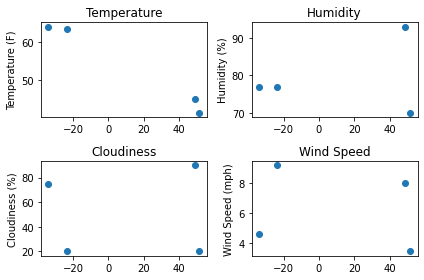

<Figure size 1440x1440 with 0 Axes>

In [4]:
#Plot scatter plots
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(lat,temp)
axs[0,0].title.set_text('Temperature')
axs[0,0].set_ylabel("Temperature (F)")
plt.show

axs[0,1].scatter(lat,humidity)
axs[0,1].title.set_text('Humidity')
axs[0,1].set_ylabel("Humidity (%)")

axs[1,0].scatter(lat,cloudiness)
axs[1,0].title.set_text('Cloudiness')
axs[1,0].set_ylabel("Cloudiness (%)")

axs[1,1].scatter(lat,wind_spd)
axs[1,1].title.set_text('Wind Speed')
axs[1,1].set_ylabel("Wind Speed (mph)")

plt.tight_layout()
plt.figure(figsize = (20,20))


#Save figure to PNG file
fig.savefig("PNG_Files/Weather.png")

#Need help with the following:
    #How do I make the graphs look 'nice'
    #How do I place text after each plot instead of before 
    #How do I randomly select at least 500 unique (non-repeat) cities based on latitude and longitude

In [5]:
#Create dataframe of cities and export to csv

#Create structure of df
cities_df = pd.DataFrame({'City':cities,
                          'Temperature':temp, 
                          'Humidity':humidity,
                          'Cloudiness':cloudiness, 
                          'Wind_Speed':wind_spd,
                          'Latitude':lat,
                          'Longitude':long})

#Write to CSV file. Exclude indexes but include headers
cities_df.to_csv("CSV_Outputs/WeatherTable.csv", index = False, header = True)



# North vs South Latitude 

In [6]:
#Create empty lists to index to; split between North and South 

#North Latitude Variables
n_cities = []
n_temp = []
n_humidity = []
n_cloudiness = []
n_wind_spd = []
n_lat = []

#South Latitude Variables
s_cities = []
s_temp = []
s_humidity = []
s_cloudiness = []
s_wind_spd = []
s_lat = []

#iterate through desired cities and pull temperature, humidity, cloudiness, wind speed, and latitude coordinate
for city in cities:
    response = requests.get(query_url + city).json()
    if response['coord']['lat'] > 0:
        n_cities.append(city)
        n_temp.append(response['main']['temp'])
        n_humidity.append(response['main']['humidity'])
        n_cloudiness.append(response['clouds']['all'])
        n_wind_spd.append(response['wind']['speed'])
        n_lat.append(response['coord']['lat'])
    else:
        s_cities.append(city)
        s_temp.append(response['main']['temp'])
        s_humidity.append(response['main']['humidity'])
        s_cloudiness.append(response['clouds']['all'])
        s_wind_spd.append(response['wind']['speed'])
        s_lat.append(response['coord']['lat'])


#Plot North city plots
ax1 = plt.scatter(n_lat,n_humidity)
plt.title('Temperature')
plt.ylabel('Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
regress_values = n_lat[0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(49,30),fontsize=15,color="red")
plt.show()

ax2 = plt.scatter(n_lat,n_humidity)
plt.title('Temperature')
plt.ylabel('Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
regress_values = n_lat[0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(49,30),fontsize=15,color="red")


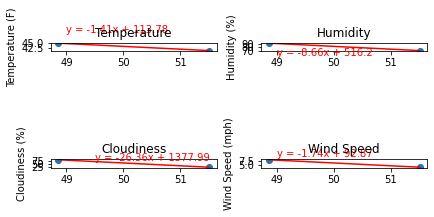

<Figure size 1440x1440 with 0 Axes>

In [7]:
#NORTH HEMISPHERE
fig, axs = plt.subplots(2,2)

#Temperature
axs[0,0].scatter(n_lat,n_temp)
axs[0,0].title.set_text('Temperature')
axs[0,0].set_ylabel("Temperature (F)")

#Regressions
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
n_lat_series = pd.Series(n_lat)
regress_values = n_lat_series* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
axs[0,0].text(49, 50, line_eq, size=10,color='red')
axs[0,0].plot(n_lat_series,regress_values,"r-")

#Humidity
axs[0,1].scatter(n_lat,n_humidity)
axs[0,1].title.set_text('Humidity')
axs[0,1].set_ylabel("Humidity (%)")

#Regressions
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_humidity)
regress_values = n_lat_series* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
axs[0,1].text(49, 55, line_eq, size=10,color='red')
axs[0,1].plot(n_lat_series,regress_values,"r-")

#Cloudiness
axs[1,0].scatter(n_lat,n_cloudiness)
axs[1,0].title.set_text('Cloudiness')
axs[1,0].set_ylabel("Cloudiness (%)")

#Regressions
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloudiness)
regress_values = n_lat_series* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
axs[1,0].text(49.5, 75, line_eq, size=10,color='red')
axs[1,0].plot(n_lat_series,regress_values,"r-")

#Wind Speed
axs[1,1].scatter(n_lat,n_wind_spd)
axs[1,1].title.set_text('Wind Speed')
axs[1,1].set_ylabel("Wind Speed (mph)")

#Regressions
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind_spd)
regress_values = n_lat_series* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
axs[1,1].text(49, 10, line_eq, size=10,color='red')
axs[1,1].plot(n_lat_series,regress_values,"r-")

plt.tight_layout()
plt.figure(figsize = (20,20))

#Save figure to PNG file
fig.savefig("PNG_Files/NorthLatitude.png")


In [8]:
#Create dataframe of cities and export to csv

#Create structure of df
n_cities_df = pd.DataFrame({'City':n_cities,
                          'Temperature':n_temp, 
                          'Humidity':n_humidity,
                          'Cloudiness':n_cloudiness, 
                          'Wind_Speed':n_wind_spd,
                          'Latitude':n_lat})

#Write to CSV file. Exclude indexes but include headers
n_cities_df.to_csv("CSV_Outputs/NorthLatitudeTable.csv", index = False, header = True)

C:\Users\niraj\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


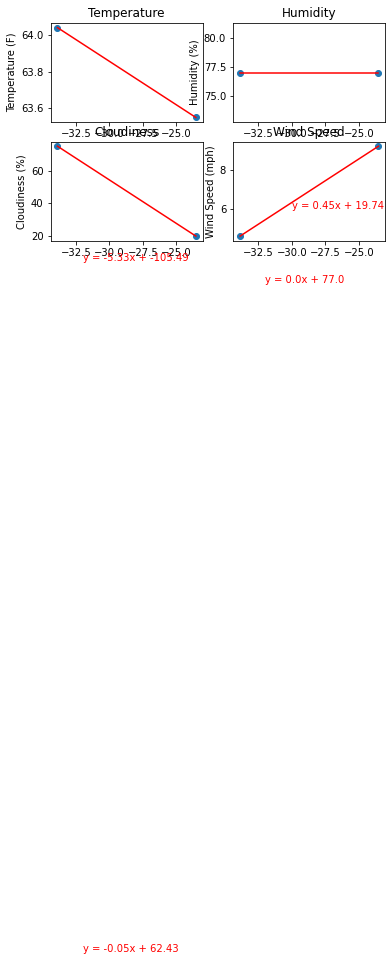

<Figure size 1440x1440 with 0 Axes>

In [9]:
#SOUTHERN HEMISPHERE
#Temperature
fig1, ax1 = plt.subplots(2,2)
ax1[0,0].scatter(s_lat,s_temp)
ax1[0,0].title.set_text('Temperature')
ax1[0,0].set_ylabel("Temperature (F)")

#Regressions
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
s_lat_series = pd.Series(s_lat)
regress_values = s_lat_series* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1[0,0].text(-32, 59, line_eq, size=10,color='red')
ax1[0,0].plot(s_lat_series,regress_values,"r-")


#Humidity
ax1[0,1].scatter(s_lat,s_humidity)
ax1[0,1].title.set_text('Humidity')
ax1[0,1].set_ylabel("Humidity (%)")

#Regressions
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_humidity)
regress_values = s_lat_series* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1[0,1].text(-32, 59, line_eq, size=10,color='red')
ax1[0,1].plot(s_lat_series,regress_values,"r-")


#Cloudiness
ax1[1,0].scatter(s_lat,s_cloudiness)
ax1[1,0].title.set_text('Cloudiness')
ax1[1,0].set_ylabel("Cloudiness (%)")

#Regressions
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloudiness)
s_lat_series = pd.Series(s_lat)
regress_values = s_lat_series* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1[1,0].text(-32, 5, line_eq, size=10,color='red')
ax1[1,0].plot(s_lat_series,regress_values,"r-")

ax1[1,1].scatter(s_lat,s_wind_spd)
ax1[1,1].title.set_text('Wind Speed')
ax1[1,1].set_ylabel("Wind Speed (mph)")

#Regressions
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_wind_spd)
regress_values = s_lat_series* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax1[1,1].text(-30, 6, line_eq, size=10,color='red')
ax1[1,1].plot(s_lat_series,regress_values,"r-")

plt.tight_layout()
plt.figure(figsize = (20,20))

#Save figure to PNG file
fig.savefig("PNG_Files/SouthLatitude.png")


In [10]:
#Create dataframe of cities and export to csv

#Create structure of df
s_cities_df = pd.DataFrame({'City':s_cities,
                          'Temperature':s_temp, 
                          'Humidity':s_humidity,
                          'Cloudiness':s_cloudiness, 
                          'Wind_Speed':s_wind_spd,
                          'Latitude':s_lat})

#Write to CSV file. Exclude indexes but include headers
s_cities_df.to_csv("CSV_Outputs/SouthLatitudeTable.csv", index = False, header = True)

# Part 2 : VacationPy

In [11]:
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [12]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig2 = gmaps.figure(layout=figure_layout)

In [13]:
locations_df = cities_df[['Latitude','Longitude']].astype(float)

humidity_df = cities_df['Humidity'].astype(float)

humidity_df

0    93.0
1    77.0
2    70.0
3    77.0
Name: Humidity, dtype: float64

In [14]:
heat_layer = gmaps.heatmap_layer(locations_df, weights = humidity_df, 
                                 dissipating = False, max_intensity = 100,
                                 point_radius = 1)

fig2.add_layer(heat_layer)
fig2

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [15]:
cities_df

,City,Temperature,Humidity,Cloudiness,Wind_Speed,Latitude,Longitude
0,Paris,44.96,93,90,8.05,48.8534,2.3488
1,Sydney,64.04,77,75,4.61,-33.8679,151.2073
2,London,41.22,70,20,3.44,51.5085,-0.1257
3,Sao Paulo,63.55,77,20,9.22,-23.5475,-46.6361


In [16]:
#Narrow down the DataFrame to find your ideal weather condition

#Temparture between 70 and 80 (exclusive)
ideal_cities_df = cities_df.loc[cities_df['Temperature'] < 80 & (cities_df['Temperature'] > 70), :]

#Wind Speed < 10mph
ideal_cities_df = ideal_cities_df.loc[ideal_cities_df['Wind_Speed'] < 10,:]

#Zero cloudiness
ideal_cities_df = ideal_cities_df.loc[ideal_cities_df['Cloudiness']==0,:]



In [17]:
ideal_cities_df

,City,Temperature,Humidity,Cloudiness,Wind_Speed,Latitude,Longitude


In [67]:
#Get length of dataframe
rows = len(cities_df)

#Define parameters
target_radius = 5000
target_type = "hotel"

#Coordinates
coordinates = []

#Info Box
info_box_list = []

#Bold text for use in markers

class style:
   BOLD = '\033[1m'
   END = '\033[0m'

name = style.BOLD + 'Name' + style.END 
city = style.BOLD + 'City' + style.END 
country = style.BOLD + 'Country' + style.END

#Iterate through
for index in range(0,rows):
    
    #Pull latitude and longitude
    latitude = cities_df.loc[index,'Latitude']
    longitude = cities_df.loc[index,'Longitude']
    
    #City
    ideal_city = cities_df.loc[index,"City"]
    
    #Create string to use as paramater
    target_coordinates = f'{latitude}, {longitude}'
    
    #Set up a parameters dictionary
    params = {
        "location": target_coordinates,
        #"keyword": target_search,
        "radius": target_radius,
        "type": target_type,
        "key": gkey
    }

    #Base url
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    #Run a request using our params dictionary
    response = requests.get(base_url, params=params)
    
    places_data = response.json()
    
    #Put coordinates into a list of tuples for markers
    coordinate = (latitude, longitude)
    coordinates.append(coordinate)
    
    #Hotel
    places_data = response.json()
    hotel = places_data["results"][1]["name"]
    
    #Info_box_content
    info_box = f'Name: {hotel}\nCity: {ideal_city}\nCountry: '
    info_box_list.append(info_box)
    

markers = gmaps.marker_layer(coordinates, hover_text=info_box_list )
fig2.add_layer(markers)
fig2

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [31]:
#geocoordinates
target_coordinates = "-23.5475, -46.6361"
#target_search = "Chinese"
target_radius = 5000
target_type = "hotel"

# set up a parameters dictionary
params = {
    "location": target_coordinates,
    #"keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)



In [33]:
places_data = response.json()
print(json.dumps(places_data, indent=4, sort_keys=True))

{
    "html_attributions": [],
    "next_page_token": "ATtYBwLIIEmiWdk9GcPS4C8ndXRJ7pn8THe7x4DEhmAwdCLnk5fGXp196VuzKtQqFNPKEKH_-E-b2M2mJ7HETQ2oWh3MaYQ2ZM1YQX41yaQBXY22mQzO-f0nEPtyXnN2rTqJF7Zymlkla69MOGMTCWGHIQEk1YJ2eJHQCNYv8PSHdBaCZw0ROpxsJ9S_5l7uB0zlCZTwiFxHsi_HNOv9GO2j8dTnyIaubHNYWLM3webxoEAjNWi1e83safmySkOd02h3ou1lnikQuICzDrn_7wTHDuFDOIj98eMj5PLxa27Jy0hZaM_RA2CuUUwj7V6cIiWoQGw6c6oy0eBpspuI4tuWgMvXdeyIpCjjwJSd8zKie8c4h__KNMVykAOootbQBUWECCIg5qjYWW-Fv4bHxTKolRZzkR8wYlUPlLLS9pzdJqZ6yKUwJh2Ghw",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": -23.5505199,
                    "lng": -46.63330939999999
                },
                "viewport": {
                    "northeast": {
                        "lat": -23.35660394283147,
                        "lng": -46.36508442078742
                    },
                    "southwest": {
                        "lat": -24.00822091258167,
                        "lng": -46.82

In [41]:
print(places_data["results"][1]["name"])


Hotel São Paulo Inn
